## Create Initial states

In [1]:
import numpy as np
from pathlib import Path
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt

from src.models.normal import NormalDegradationModel as NModel

In [2]:
data_name = "DS03"

device = "cpu"
experiment_dir = Path('experiments')/data_name
states_dir = experiment_dir/'states'
os.makedirs(states_dir, exist_ok=True)

## Import training data


In [3]:
hi_df = pd.read_csv(experiment_dir/'hidata_dev.csv')

### get only degraded data

In [4]:
hi_df = hi_df[hi_df['hs']==0]
del hi_df['hs']

In [5]:
perform_alias = [col for col in hi_df.columns if col not in ['unit','cycle']]
units = hi_df['unit'].unique().tolist()

In [6]:
performs_train = {alias: 
    {int(unit): hi_df[hi_df['unit']==unit][alias].values for unit in units} 
    for alias in perform_alias
}
time_train = {int(unit): hi_df[hi_df['unit']==unit]['cycle'].values for unit in units}

## Load best model

Plotting for perform: T48
  Unit: 1


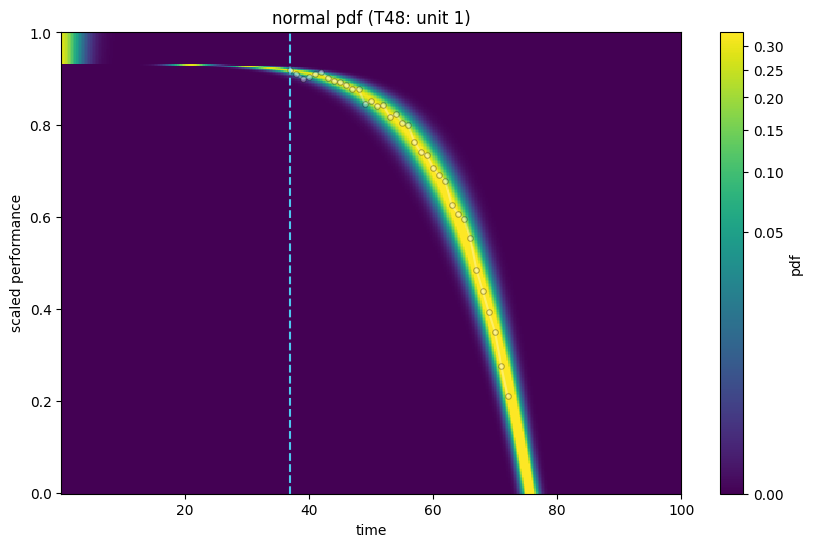

  Unit: 2


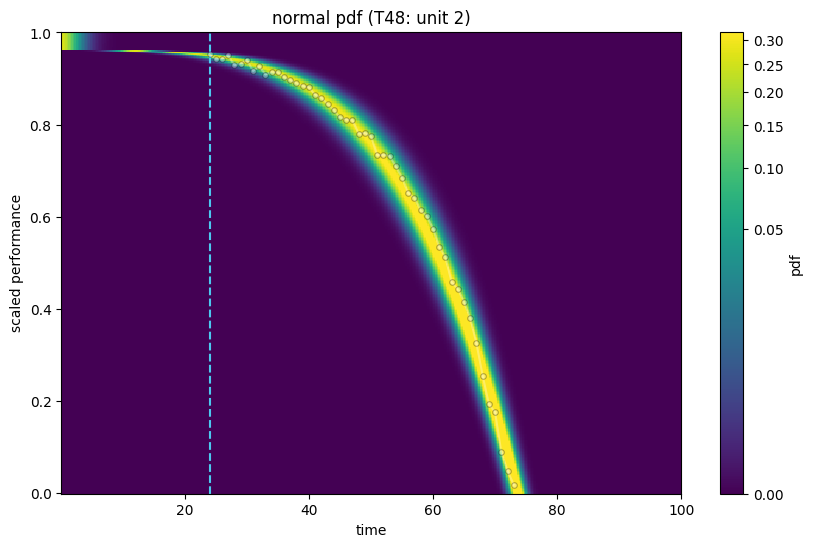

  Unit: 3


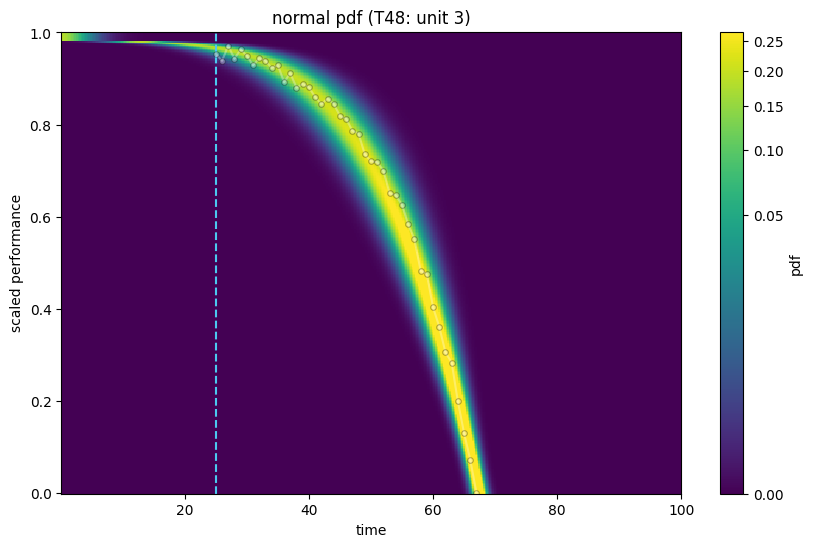

  Unit: 4


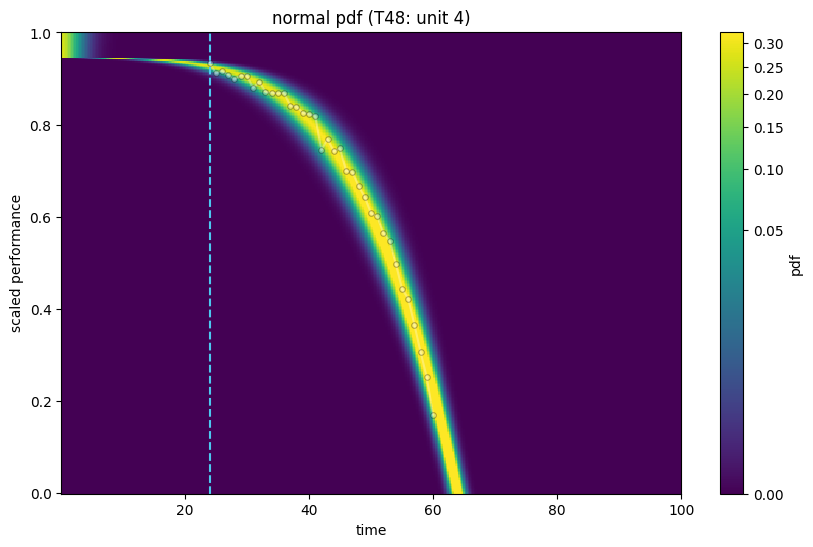

  Unit: 5


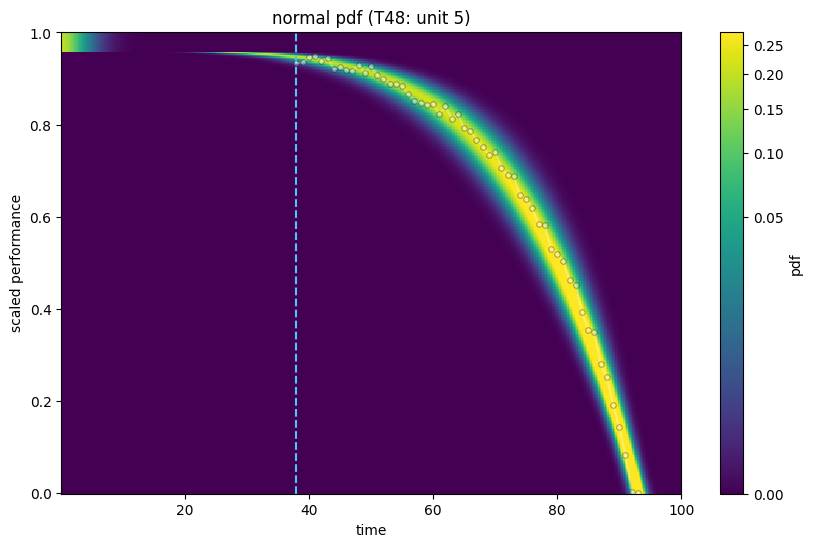

  Unit: 6


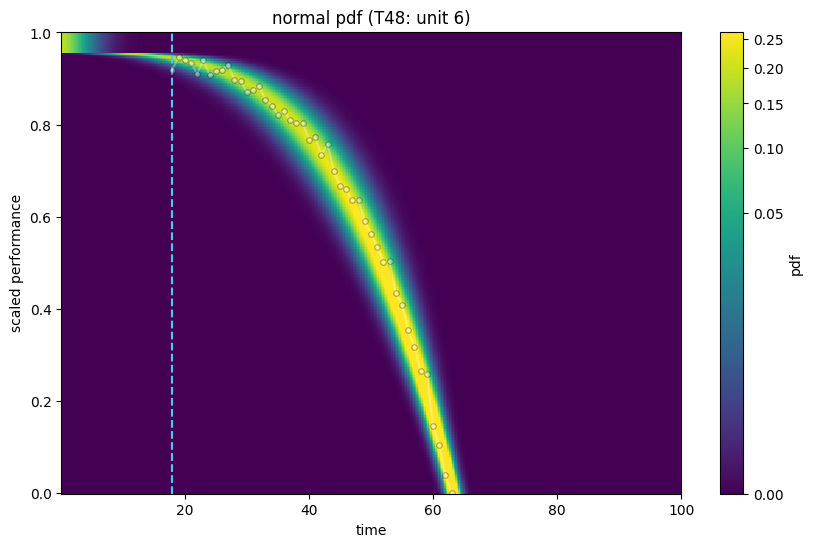

  Unit: 7


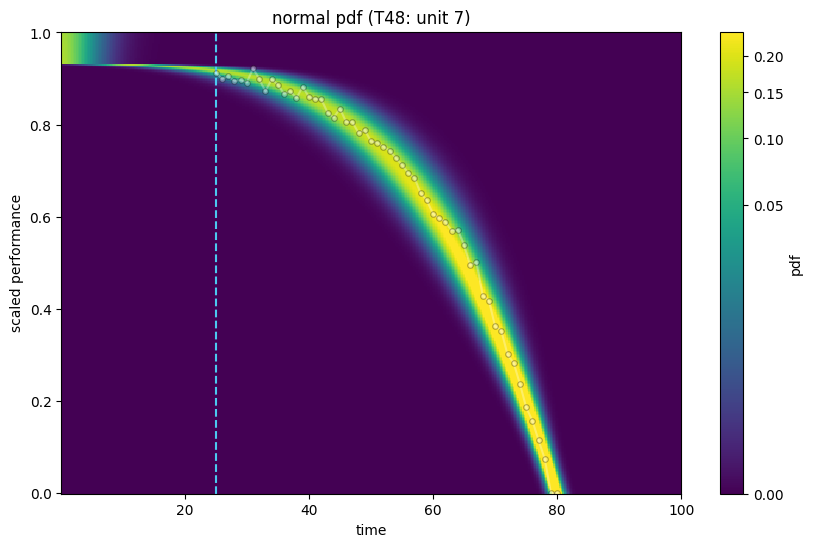

  Unit: 8


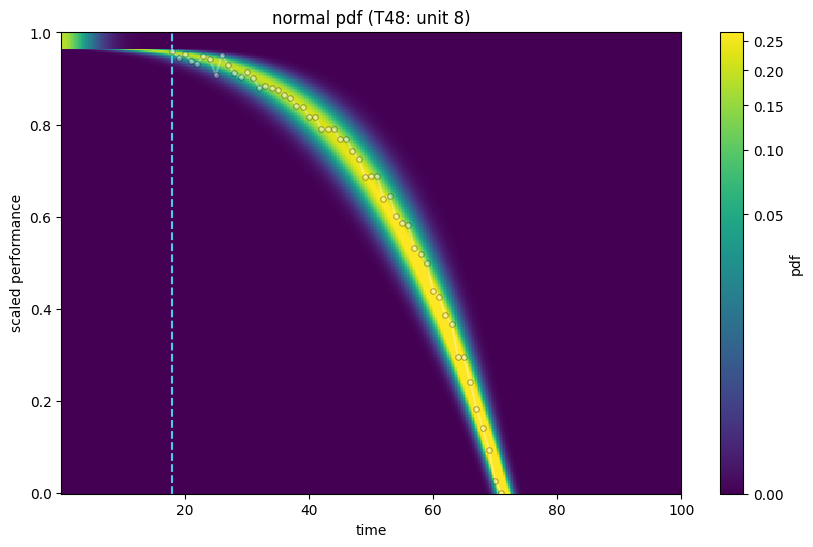

  Unit: 9


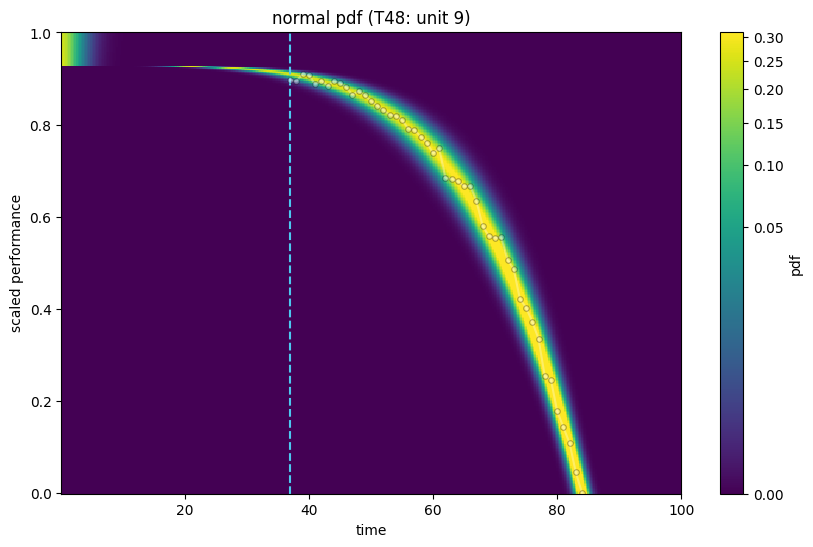

Plotting for perform: SmLPC
  Unit: 1


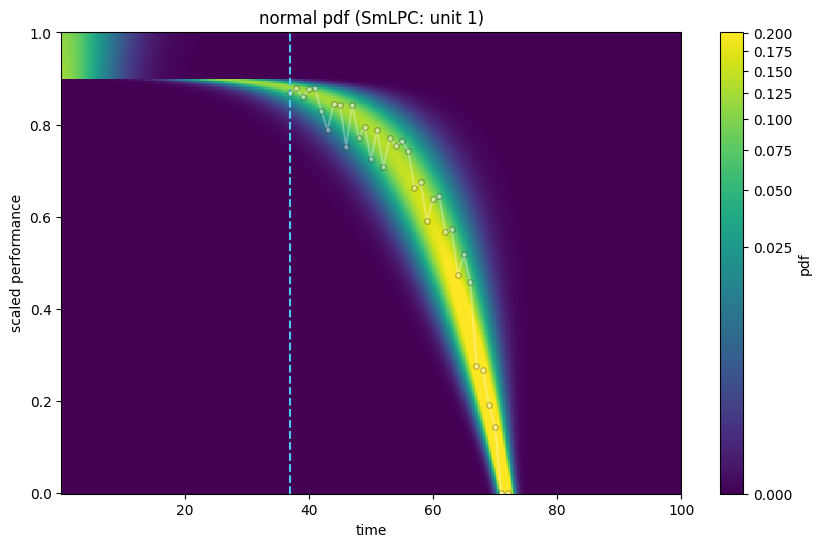

  Unit: 2


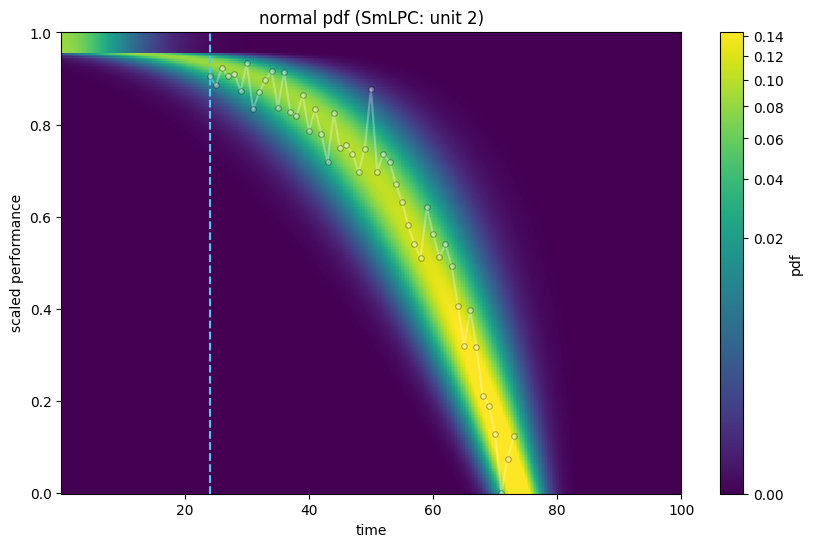

  Unit: 3


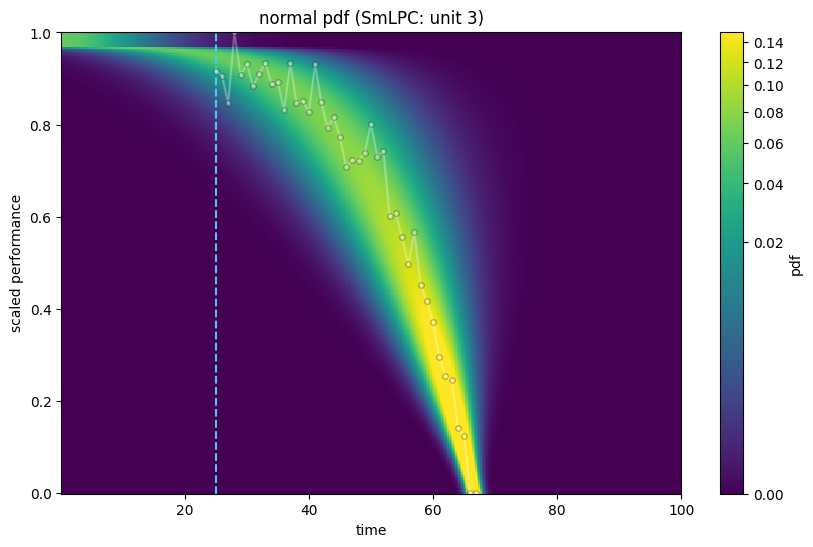

  Unit: 4


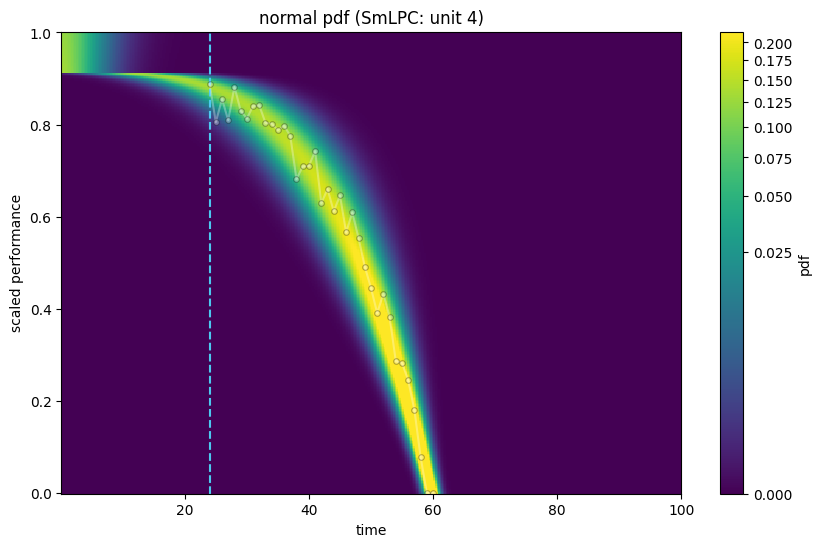

  Unit: 5


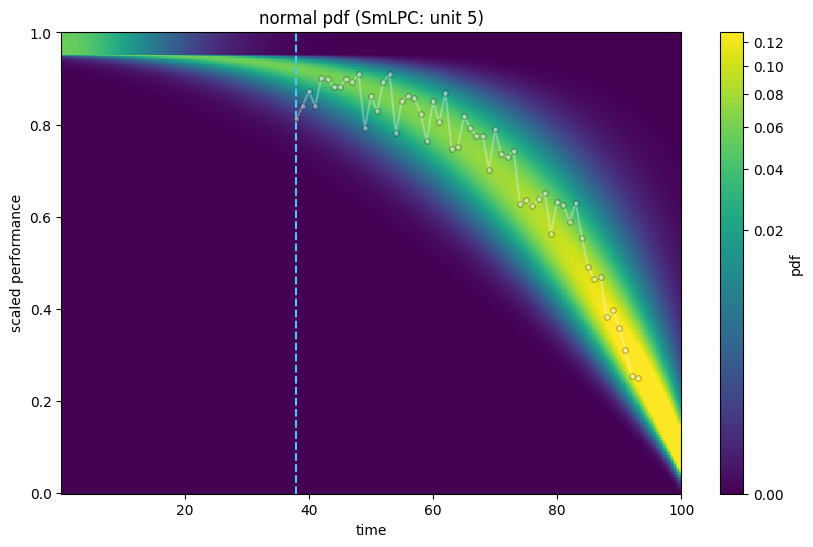

  Unit: 6


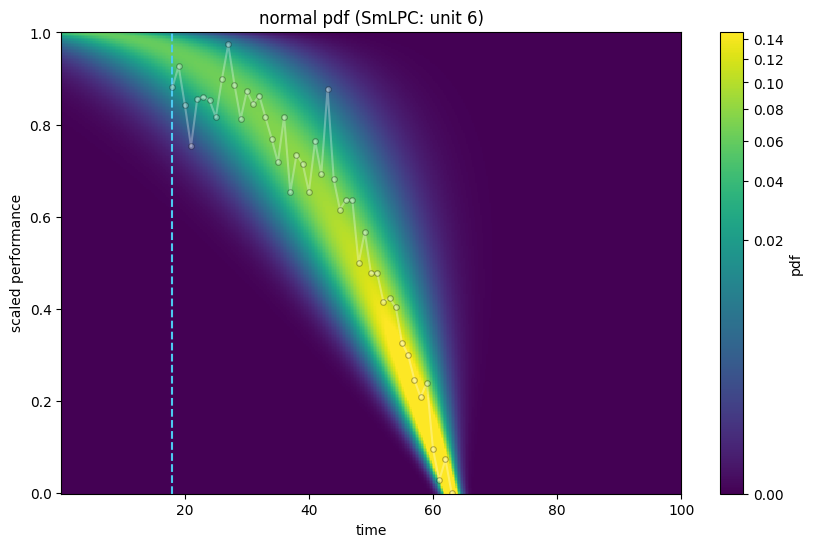

  Unit: 7


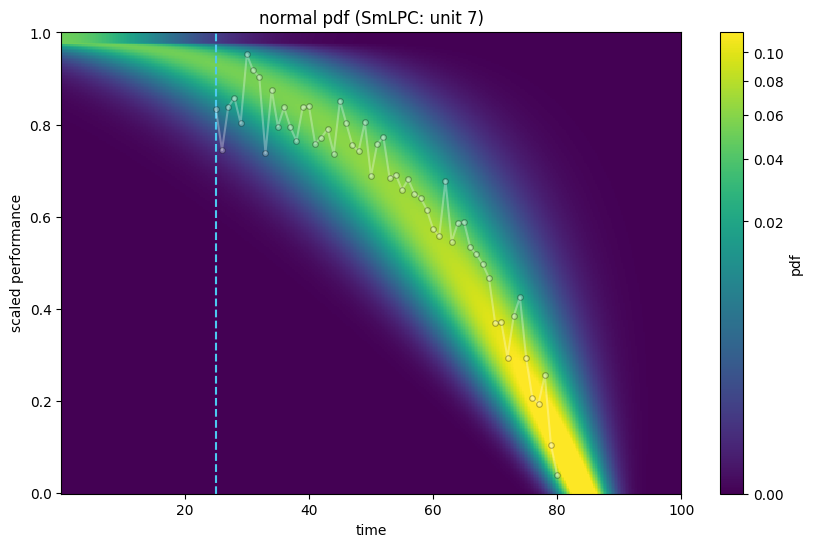

  Unit: 8


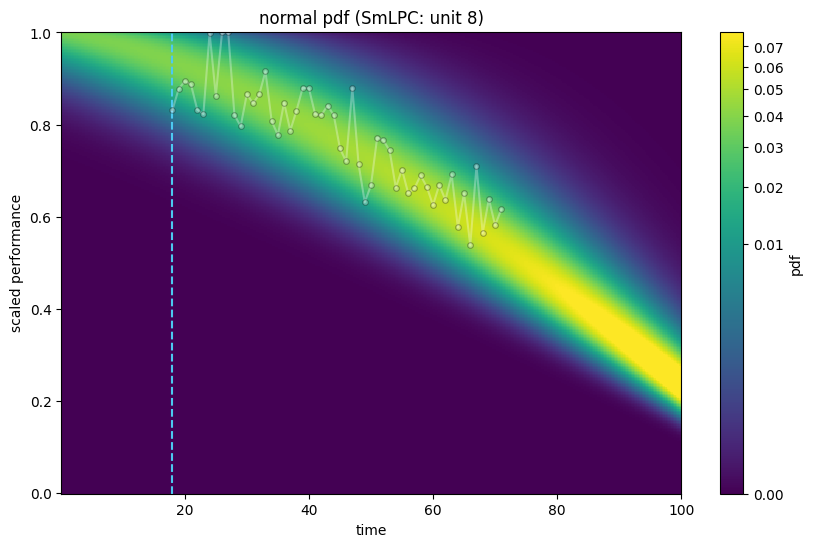

  Unit: 9


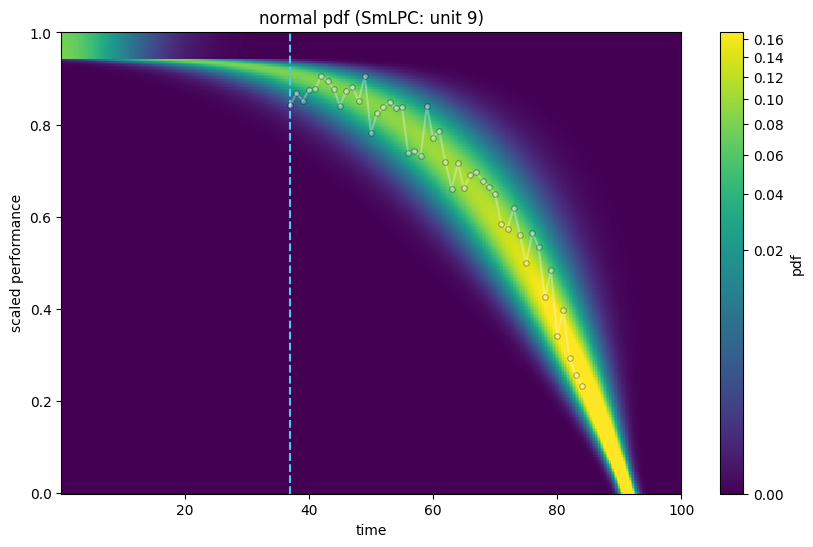

Plotting for perform: SmHPC
  Unit: 1


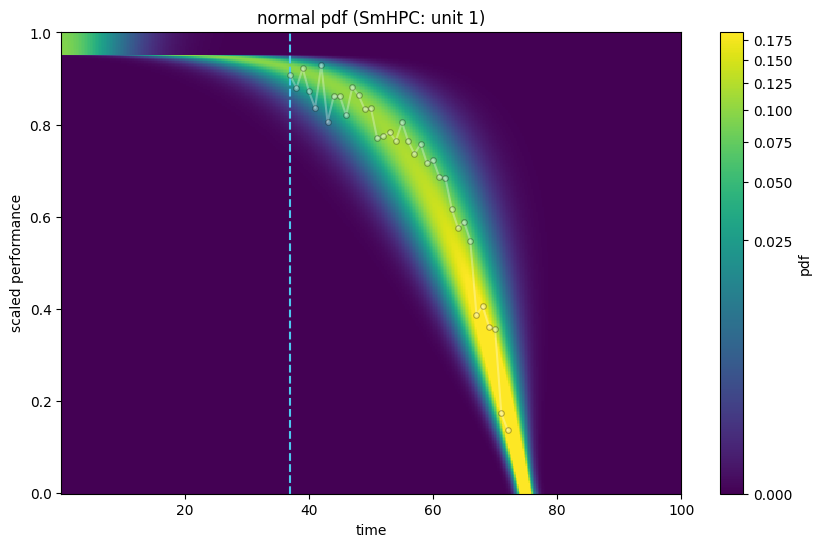

  Unit: 2


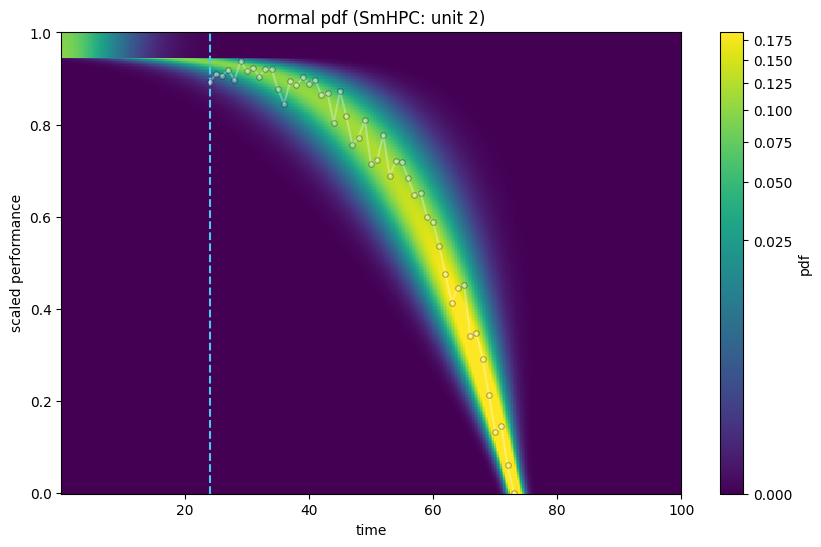

  Unit: 3


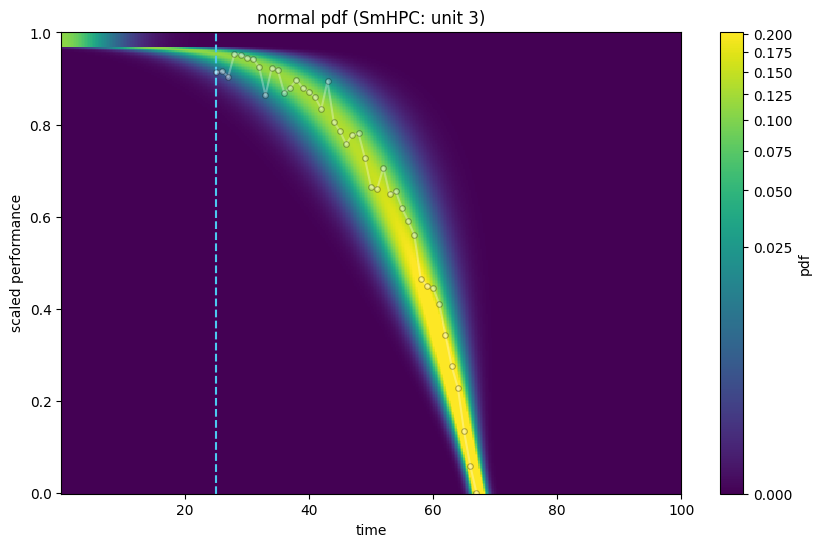

  Unit: 4


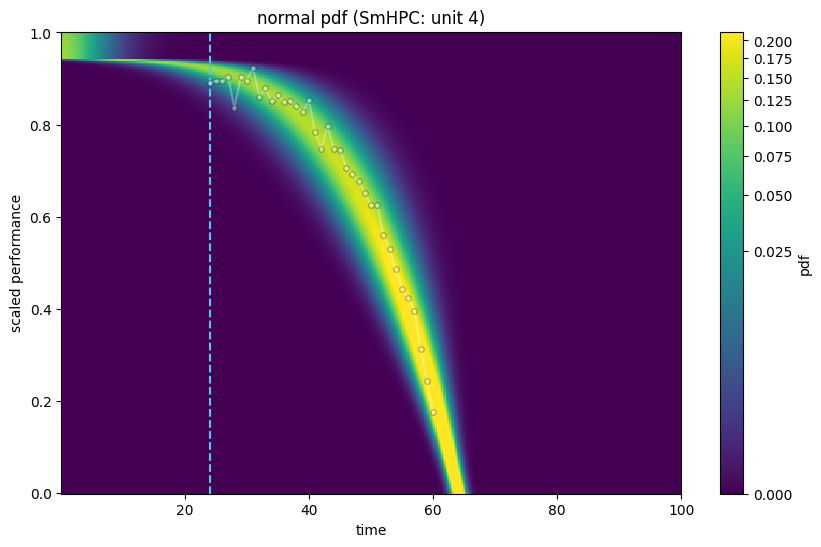

  Unit: 5


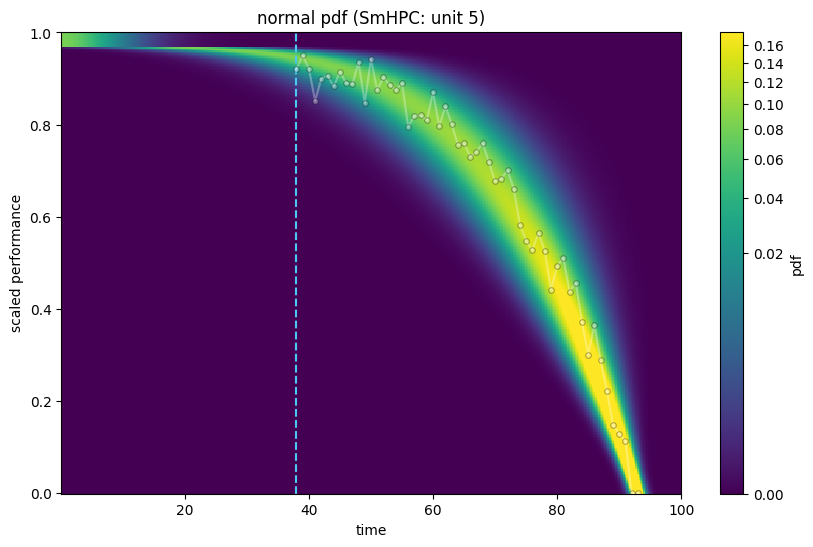

  Unit: 6


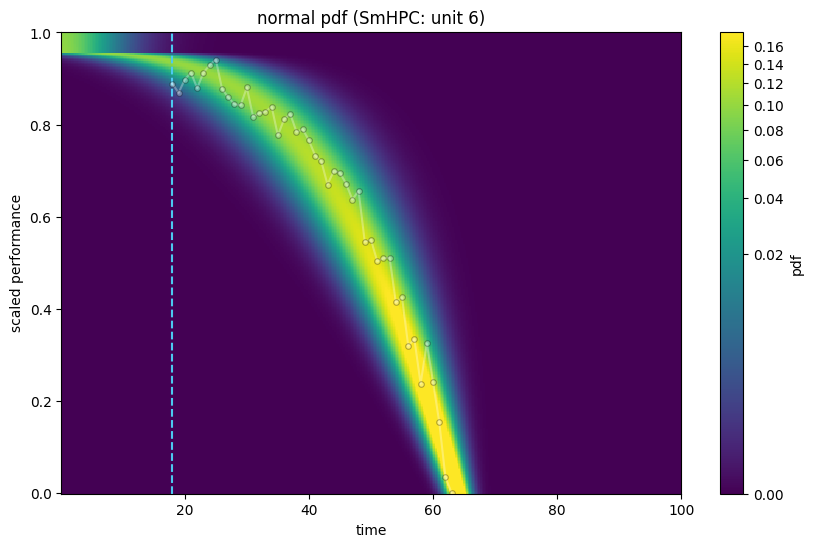

  Unit: 7


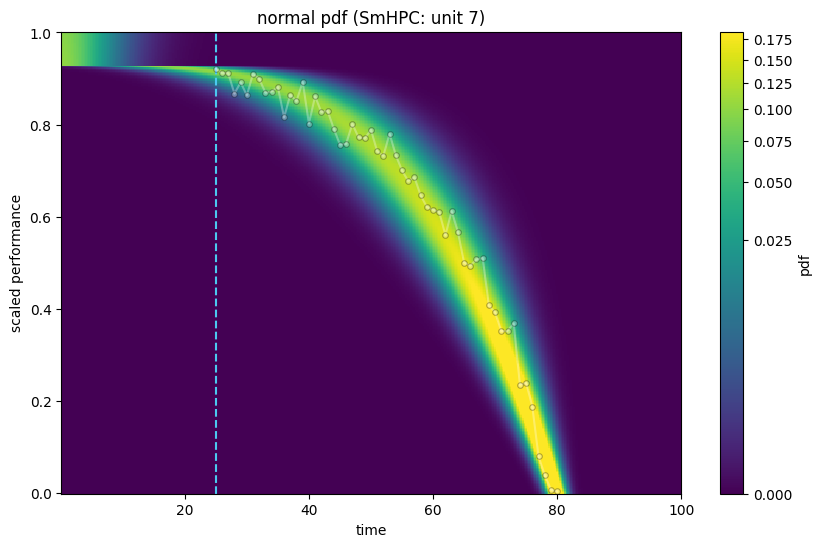

  Unit: 8


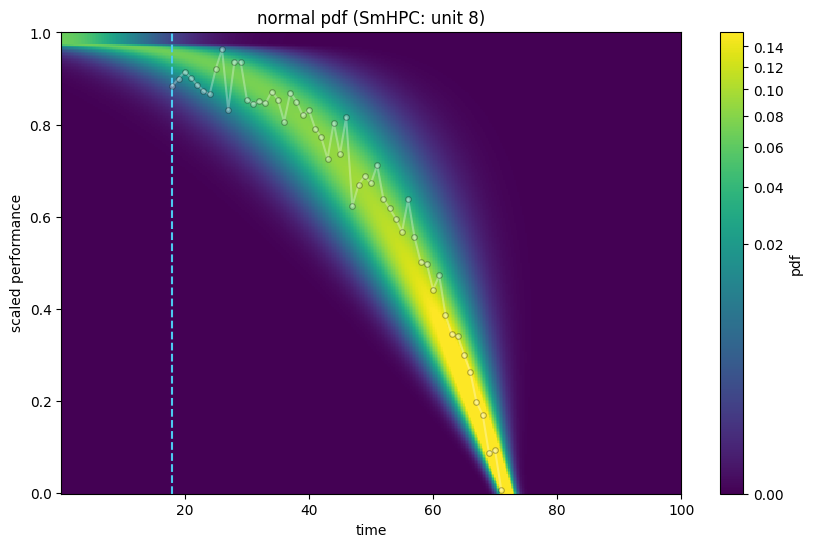

  Unit: 9


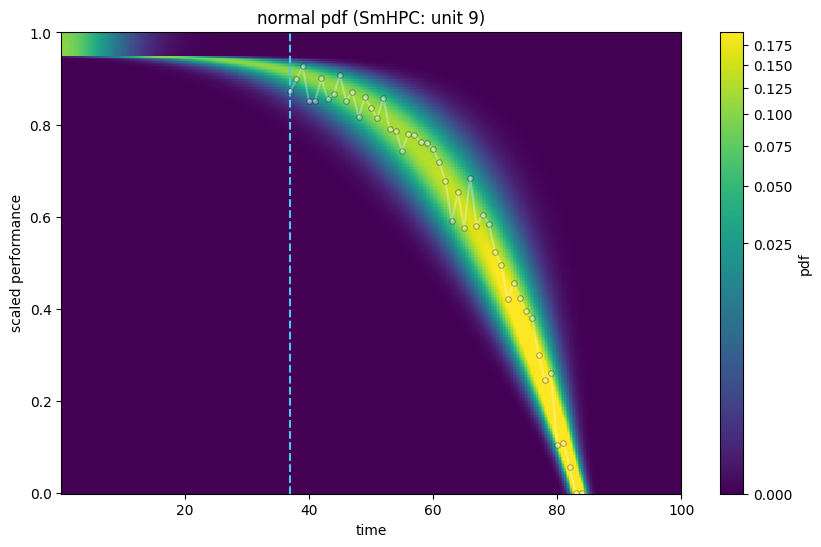

In [7]:
t = np.linspace(0.1, 100, 400)  # Start from 0.1 instead of 0.0 (LogNormal support is t > 0)
s = np.linspace(0.0, 1.0, 300)


for name, units_perform in performs_train.items():
	print(f"Plotting for perform: {name}")
	for unit, perform in units_perform.items():
		print(f"  Unit: {unit}") 

		s_np:np.ndarray = perform
		t_np:np.ndarray = time_train[unit]

		best_model = NModel()
		best_model.load_state_dict(
			torch.load(states_dir /name/f'unit_{unit}'/ "best_model.pt", map_location=device)
		)
		best_model.to(device)
		best_model.eval()

		ax = best_model.plot_distribution(
			t=t,
			s=s,
			func="pdf",
			title=f"normal pdf ({name}: unit {unit})",
		)



		ax.set_xlim([t.min(), t.max()])
		ax.plot(t_np,s_np,'o-',
				color='white',alpha=0.3,markersize=4,markeredgecolor='black',markeredgewidth=0.8,
				label='data')
		plt.show()

## Show parameters

In [8]:
for p in best_model.named_parameters():
    print(p)

('m0_raw', Parameter containing:
tensor(2.8975, requires_grad=True))
('m1_raw', Parameter containing:
tensor(83.4799, requires_grad=True))
('p_raw', Parameter containing:
tensor(-1.3132, requires_grad=True))
('v0_raw', Parameter containing:
tensor(-2.8384, requires_grad=True))
('v1_raw', Parameter containing:
tensor(4.0391, requires_grad=True))
